<font size="6"><b>Optimization Examples</b></font>

Table of Contents
<div id="toc"></div>

<font size="5"><b>General or Standard Forms</b></font>
1. Linear programming
$$\begin{align*}
\min_{x} \quad & f^Tx \\
\text{subject to} \quad 
& Ax \leq b\\
& A_{eq}x = b_{eq}\\
& LB \leq x \leq UB
\end{align*}
$$

2. Integer programming
$$\begin{align*}
\min_{x} \quad & f^Tx \\
\text{subject to} \quad
& Ax \leq b\\
& A_{eq}x = b_{eq}\\
& LB \leq x \leq UB\\
& x \in \mathbb{Z} \;\text{(integer)}
\end{align*}
$$

3. Mixed integer linear programming
$$\begin{align*}
\min_{x,z} \quad & f^T
\begin{bmatrix} x \\ z \end{bmatrix} \\
\text{subject to} \quad
& A \begin{bmatrix} x \\ z \end{bmatrix} \leq b \\
& A_{eq} \begin{bmatrix} x \\ z \end{bmatrix} = b_{eq}\\
& LB \leq \begin{bmatrix} x \\ z \end{bmatrix} \leq UB \\
& x \in \mathbb{R} \;\text{(real)} \\
& z \in \mathbb{Z}
\end{align*}
$$

4. Binary integer programming
$$\begin{align*}
\min_{x} \quad & f^Tx \\
\text{subject to} \quad
& Ax \leq b \\
& A_{eq}x = b_{eq} \\
& LB \leq x \leq UB \\
& x \in \{0,1\} 
\end{align*}
$$

5. Quadratic programming
$$\begin{align*}
\min_{x} \quad & \frac{1}{2}x^THx + f^Tx \\
\text{subject to} \quad
& Ax \leq b \\
& A_{eq}x = b_{eq} \\
& LB \leq x \leq UB
\end{align*}
$$

---
# 1. Mixed Integer Linear Programming (MILP)

- Matlab command: `intlinprog` (available from MATLAB R2014b)

## 1.1. Knapsack problems

- There is a container (knapsack) of capacity C = 20. 
- Furthermore, there is a set 6 of objects. 
- Each object has a weight and a value.
- Determine the number of each item to include in a collection so that the total size is less than or equal to 20 and the total value is as large as possible.

|items|1|2|3|4|5|6
|:-:|:-:|:-:|:-:|:-:|:-:|:-:
|weights|10|9|4|2|1|20
|values|175|90|20|50|10|200

<br>
Question: Can we formulate this knapsack problem into a binary integer program?

$\Rightarrow$ decision variables $\quad x_{i} \in \{0,1\} \quad i = 1,\cdots,6$

$$\begin{align*}
\max_{x} \quad & 175x_1 + 90x_2 + 20x_3 + 50x_4 + 10x_5 + 200x_6 \\
\text{subject to} \quad & 10x_1 + 9x_2 + 4x_3 + 2x_4 + x_5 + 20x_6 \leq 20 \\
\end{align*}
$$

$\Rightarrow$ `intlinprog` in Matlab to solve

In [4]:
% given
n = 6;  % # of items
weights = [10 9 4 2 1 20];
values = [175 90 20 50 10 200];
maxWeight = 20;

% in a form of MILP
f = -values;        % max
A = weights;
b = maxWeight;
intcon = 1:n;
lb = zeros(n,1);
ub = ones(n,1);

x = intlinprog(f,intcon,A,b,[],[],lb,ub)

LP:                Optimal objective value is -305.000000.                                          

Cut Generation:    Applied 1 strong CG cut.                                                         
                   Lower bound is -275.000000.                                                      
                   Relative gap is 0.00%.                                                          


Optimal solution found.

Intlinprog stopped at the root node because the objective value is within a gap tolerance of the optimal value, options.TolGapAbs = 0
(the default value). The intcon variables are integer within tolerance, options.TolInteger = 1e-05 (the default value).


x =

    1.0000
    1.0000
         0
         0
    1.0000
         0

## 1.2. Factory and warehouse

- A campany wants to

 1) build new factory in Ulsan, Busan, or both
 
 2) build new warehouse (only one has to be built)
 
 3) warehouse must be built in a city of a new factory


- Available capital to build is 10. We want to maximize total profit.


| | |Profit|Cost to build
|:-:|:-|:-:|:-:
|1|Build a factory in Ulsan|7|5
|2|Build a factory in Busan|5|3
|3|Build a warehouse in Ulsan|6|5
|4|Build a warehouse in Busan|4|2


- Form a binary integer programming to find the optimal locations of new factory and warehouse, and solve it using `intlinprog` in MATLAB.
 
 (Hint: define binary decision variables, then use them to define objective function and constraints.)

In [5]:
f = -[7 5 6 4]';
intcon = [1 2 3 4];
A = [5 3 5 2;
    -1 -1 0 0;
    -1 0 1 0;
    0 -1 0 1];
b = [10;
    -1;
    0;
    0];

Aeq = [0 0 1 1];
beq = [1];

lb = [0 0 0 0]';
ub = [1 1 1 1]';
[x fval] = intlinprog(f,intcon,A,b,Aeq,beq,lb,ub)

LP:                Optimal objective value is -16.000000.                                           


Optimal solution found.

Intlinprog stopped at the root node because the objective value is within a gap tolerance of the optimal value, options.TolGapAbs = 0
(the default value). The intcon variables are integer within tolerance, options.TolInteger = 1e-05 (the default value).


x =

    1.0000
    1.0000
         0
    1.0000


fval =

   -16

## 1.3. Shortest path



- Binary integer programming can be applied to finding the shortest path in the graph.


- Define the binary decision variables and form the binary integer programming. Then you can solve it using `intlinprog` command in MATLAB


<img src = "./image_files/opt_06.bmp">

In [6]:
f = [1 4 2 4 8 11 3]';
Aeq = [1 1 0 0 0 0 0
    1 0 -1 0 0 -1 0
    0 1 1 -1 -1 0 0
    0 0 0 1 0 0 -1
    0 0 0 0 1 1 1];
beq = [1 0 0 0 1]';

intcon = 1:7;
lb = zeros(7,1);
ub = ones(7,1);

x = intlinprog(f,intcon,[],[],Aeq,beq,lb,ub)

LP:                Optimal objective value is 10.000000.                                            


Optimal solution found.

Intlinprog stopped at the root node because the objective value is within a gap tolerance of the optimal value, options.TolGapAbs = 0
(the default value). The intcon variables are integer within tolerance, options.TolInteger = 1e-05 (the default value).


x =

     1
     0
     1
     1
     0
     0
     1

---
# 2. Quadratic Programming (QP) 


## 2.1. Best location at a concert

<img src="./image_files/concert.png", width = 300>

Question: Find the best location to listen to singer's voice

$$\begin{align*}
\Rightarrow \quad \min \quad
&  \sqrt{(x_1-3)^{2}+(x_2-3)^{2}} \\
\Rightarrow \quad \min \quad
& (x_1-3)^{2} + (x_2-3)^{2} \\
\text{subject to} \quad
& x_1 + x_2 \leq 3 \\
& x_1 \geq 0 \\
& x_2 \geq 0
\end{align*}
$$

<br>
$$\begin{align*}
\Rightarrow \quad & x_1^{2} - 6x_1 + 9 + x_2^{2} - 6x_2 + 9 \\
& = x_1^{2} + x_2^{2} - 6 x_1 - 6x_2 + 18 \\
& = \frac{1}{2} \begin{bmatrix} x_1 & x_2 \end{bmatrix}
\begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} - 
\begin{bmatrix} 6 & 6 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + 18 \\
& \begin{bmatrix} 1 & 1 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \leq 3 \\
& \begin{bmatrix} 0 \\ 0 \end{bmatrix} \leq
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \leq
\begin{bmatrix} \\ \\ \end{bmatrix}
\end{align*}
$$

In [11]:
H = [2 0;
    0 2];
f = -[6 6]';
A = [1 1];
b = 3;
lb = [0 0]';

x = quadprog(H,f,A,b,[],[],lb,[])

Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the default value of the function tolerance,
and constraints are satisfied to within the default value of the constraint tolerance.




x =

    1.5000
    1.5000

# 3. Convecx Problems (CVX)

## 3.1. Shortest distance

<img src = "./image_files/river2.png", width = 400>

<br>

$$ \min \; d_1 + d_2 = \min \left\rVert \vec{a} - \begin{bmatrix}x\\0\end{bmatrix}\right\rVert_2  + \left\rVert \vec{b} - \begin{bmatrix}x\\0\end{bmatrix}\right\rVert_2$$

- $ \vec{a} \rightarrow \begin{bmatrix}x\\0\end{bmatrix}$: walk with an empty bucket
- $ \begin{bmatrix}x\\0\end{bmatrix} \rightarrow \vec{b}$: walk with a water-filled bucket

$$\implies \min d_1 + \mu d_2$$

- can use cvx to find $x$

In [8]:
clear all,  clc

pt1 = [0 2]';
pt2 = [4 1]';
mu = 1;         % can give different weight

cvx_begin quiet
    variable x
    minimize norm([x 0]'-pt1,2) + mu*norm([x 0]'-pt2,2)
cvx_end

x
cvx_optval

x =

    2.6665


cvx_optval =

    5.0000

## 3.2. Weber problems

<img src="./image_files/weber.png", width = 400>

-  Find a point in the plane that minimizes the sum of the transportation costs (or distance) from this point to $n$ destination points

In [1]:
clear all
clc

A = [sqrt(3) 0]';
B = [-sqrt(3) 0]';
C = [0 1+2]';

cvx_begin quiet
    variable x(2,1)
    minimize norm(x-A,2) + norm(x-B,2) + norm(x-C,2)
cvx_end
x
cvx_optval

x =

   -0.0000
    1.0000


cvx_optval =

    6.0000

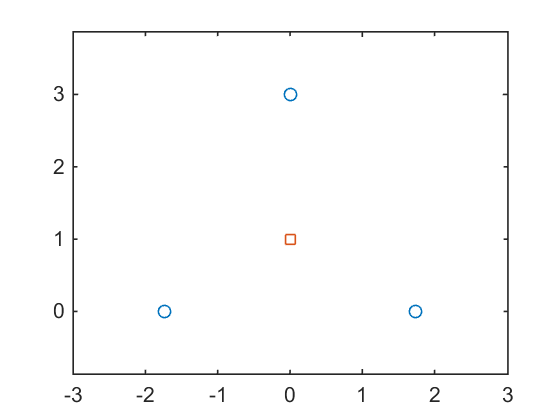

In [2]:
pts = [A B C];
plot(pts(1,:),pts(2,:),'o'), hold on
plot(x(1),x(2),'s'), hold off
axis equal
xlim([-3,3])

In [13]:
P = [A;B;C];
Phi = repmat(eye(2),[3,1]);

cvx_begin quiet
    variable x(2,1)
    minimize norm(Phi*x-P,1)
cvx_end
x
cvx_optval

x =

   1.0e-08 *

   -0.0005
    0.1935


cvx_optval =

    6.4641

## 3.3. Piece-wise linear programming

Linear vs. Affine
- Linear

$$f(x)=a^Tx$$

- Affine 

$$ f(x) = a^Tx + b$$

__$L_1$ norm optimization__

- $L_1$ norm

$$ \lVert y \rVert_{1}  = \sum_{i} \,\lvert y_i \rvert = \sum_{i} \, \max \left(-y_i,y_i \right) $$

- Fitting/Approximation Problem, _i.e._, sum of (absolute) residuals

$$\min \; \lVert Ax-b \rVert_1 = \lvert r_1 \rvert + \cdots + \lvert r_m \rvert$$

- LP Equivalent
    - $t = \begin{bmatrix} t_1 & t_2 & \cdots & t_m \end{bmatrix}^T $
$$
\begin{align}
\min \quad & t_1 + \cdots + t_m \\
\text{subject to} \quad 
& Ax - b \leq t \\
& -(Ax - b) \leq t 
\end{align}
$$

- LP Equivalent in Matrix Form

$$
\begin{align}
\min \quad & \begin{bmatrix} \mathbb{0} & \mathbb{1} \end{bmatrix}^T \begin{bmatrix} x \\ t \end{bmatrix} \\
\text{subject to} \quad 
& \begin{bmatrix} A & -I \\ -A & -I \end{bmatrix}\begin{bmatrix} x \\ t \end{bmatrix} 
\leq \begin{bmatrix} b \\ -b \end{bmatrix}
\end{align}
$$

- can convert it to LP or just simply use cvx

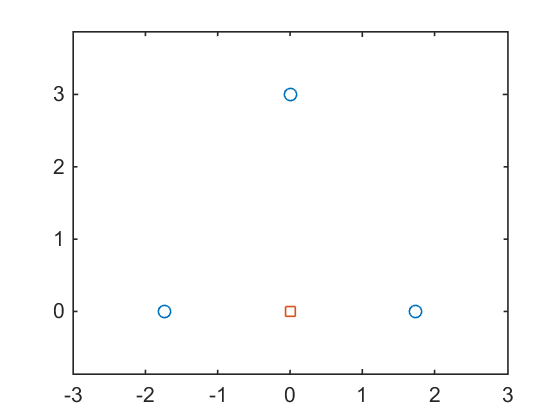

x =

   1.0e-08 *

   -0.0005
    0.3541


cvx_optval =

    6.4641

In [14]:
p1 = [sqrt(3) 0]';
p2 = [-sqrt(3) 0]';
p3 = [0 1+2]';

cvx_begin quiet
    variable x(2,1)
    % minimize norm(x-p1,2) + norm(x-p2,2) + norm(x-p3,2)
    minimize norm(x-p1,1) + norm(x-p2,1) + norm(x-p3,1)
cvx_end
x
cvx_optval

pts = [p1 p2 p3];
plot(pts(1,:),pts(2,:),'o'), hold on
plot(x(1),x(2),'s'), hold off
axis equal
xlim([-3,3])


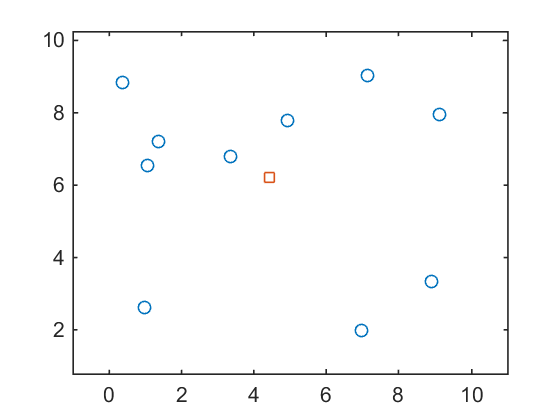

In [29]:
% weber problem in 2-norm

m = 10;
pts = 10*rand(2,10);
plot(pts(1,:),pts(2,:),'o'), axis equal, xlim([-1 11]), hold on

b = reshape(pts,[2*m,1]);
A = repmat(eye(2),[m,1]);

%w = inv(A'*A)*A'*b

cvx_begin quiet
    variables w(2,1)
    minimize norm(A*w-b,2)
cvx_end
plot(w(1),w(2),'s'), hold off

In [41]:
% weber problem in 2-norm

m = 10;
pts = 10*rand(2,10);
pts = [pts [20 20]' [19 19]']

pts =

    9.5163    0.5268    2.6912    5.4787    4.1774    3.0145    6.6634    6.9811    1.7813    9.9908   20.0000   19.0000
    9.2033    7.3786    4.2284    9.4274    9.8305    7.0110    5.3913    6.6653    1.2801    1.7112   20.0000   19.0000

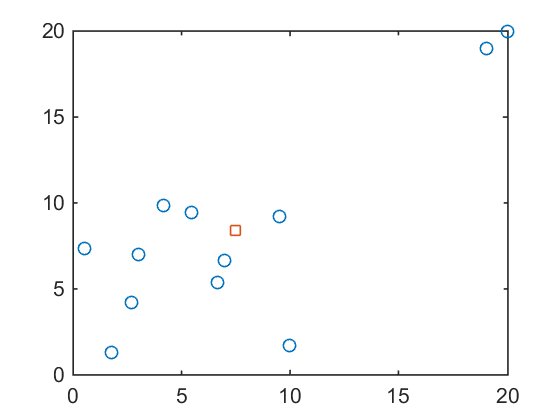

In [42]:
plot(pts(1,:),pts(2,:),'o'), 
%axis equal, xlim([-1 22]), 
hold on

b = reshape(pts,[2*(m+2),1]);
A = repmat(eye(2),[m+2,1]);

%w = inv(A'*A)*A'*b

cvx_begin quiet
    variables w(2,1)
    minimize norm(A*w-b,2)
cvx_end
plot(w(1),w(2),'s'), hold off

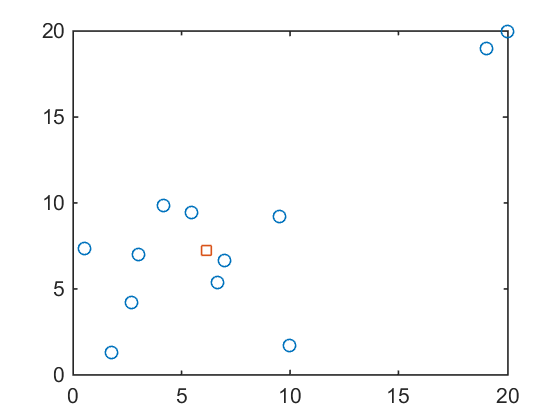

In [43]:
plot(pts(1,:),pts(2,:),'o'), 
%axis equal, xlim([-1 22]), 
hold on

b = reshape(pts,[2*(m+2),1]);
A = repmat(eye(2),[m+2,1]);

%w = inv(A'*A)*A'*b

cvx_begin quiet
    variables w(2,1)
    minimize norm(A*w-b,1)
cvx_end
plot(w(1),w(2),'s'), hold off

In [10]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>